# Dissimilarity based on wavelet decomposition
Wavelet decomposition is way to compress images. Each level of decomposition produces a series of coefficients. If computed for images to be compared, the dissimilarity of histogram of coefficients can be computed with the Jenson-Shannon divergence.

Wavelet decomposition is performed with the *PyWavelets* Python package [Lee et al., 2019]. Detailed documentation is avilable at: https://pywavelets.readthedocs.io/en/latest/ .

### Reference
Gregory R. Lee, Ralf Gommers, Filip Wasilewski, Kai Wohlfahrt, Aaron O’Leary (2019). PyWavelets: A Python package for wavelet analysis. Journal of Open Source Software, 4(36), 1237, https://doi.org/10.21105/joss.01237.

In [1]:
# import modules
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn import manifold
import pickle
from loopUI import dist_wavelet

picklefilenamewavelet = "./pickledata/synthetic-case-wavelet.pickle"
picklefilenamedata = "./pickledata/synthetic-case-data.pickle"

# plotting parameters
slice_ix=0
slice_iy=0
slice_iz=7
aspectratio = 1 # !! in pixels !!
sample_num1 = 0
sample_num2 = 10

# WVT based dissimilarity parameters
seed = 65432
max3Dnbsamples = int(0.6E3)
max2Dnbsamples = int(0.3E3)
pnorm = 2 
n_levels=4
n_bins=20

# import data
with open(picklefilenamedata, 'rb') as f:
    [lithocode_100,lithocode_50A,lithocode_50B,scalarfield_100,scalarfield_50A,
     scalarfield_50B,nx,ny,nz,nbsamples,clblab,clblabsf] = pickle.load(f)

yyy,zzz,xxx=np.meshgrid(np.arange(1,ny+1),np.flip(np.arange(1,nz+1)),np.arange(1,nx+1))
xx=xxx[slice_iz,:,:]
yy=yyy[slice_iz,:,:]
zz=zzz[slice_iz,:,:]
maxh3D = np.sqrt(nx**2+ny**2+nz**2)/3
maxh2D = np.sqrt(nx**2+ny**2)/3

lithocode_all = np.reshape(np.stack((lithocode_100,lithocode_50A,lithocode_50B),axis=4),(nz,ny,nx,nbsamples*3),order='F')
scalarfield_all = np.reshape(np.stack((scalarfield_100,scalarfield_50A,scalarfield_50B),axis=4),(nz,ny,nx,nbsamples*3),order='F')

# load classes
categval = np.unique(lithocode_all)

## 2D illustration
Each plot illustrates the wavelet decomposition of two 2D voxets called img1 and img2 at successive levels. The first column shows the initial images. The second column displays the series of coefficients as 2D voxets. The last two columns show the histograms of each type of coefficients for both images.

08-Nov-2021 (13:37:03) - COMPUTING WAVELET BASED DIST 2D continuous START
Level 0 img1 size: 113*103
Distance component: 0.012302772077608897


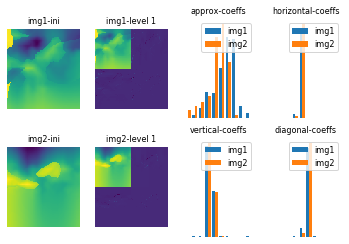

Level 1 img1 size: 57*52
Distance component: 0.014509174737212228


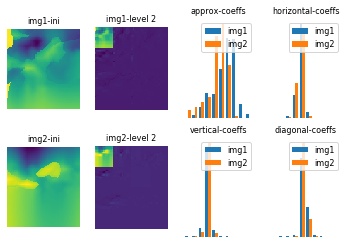

Level 2 img1 size: 29*26
Distance component: 0.020458678434287


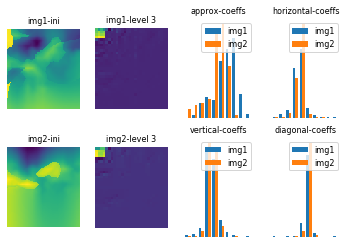

Level 3 img1 size: 15*13
Distance component: 0.03904539015414498


C:\ProgramData\Anaconda3\lib\site-packages\pywt\_multilevel.py:45: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


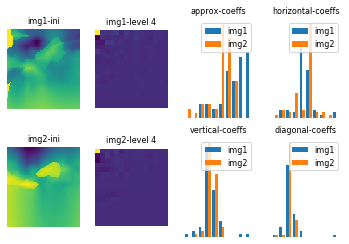

08-Nov-2021 (13:37:04) - COMPUTING WAVELET BASED DIST 2D continuous END


In [2]:
# Continuous case
img1 = scalarfield_all[slice_iz,:,:,sample_num1] # for illustration, we consider the magnetic response of random sample #9
img2 = scalarfield_all[slice_iz,:,:,sample_num2] # for illustration, we consider the magnetic response of random sample #2

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING WAVELET BASED DIST 2D continuous START")
d = dist_wavelet(img1,img2,n_levels,n_bins,plot=True,verb=True)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING WAVELET BASED DIST 2D continuous END")


08-Nov-2021 (13:37:04) - COMPUTING WAVELET BASED DIST 2D categ START
Level 0 img1 size: 113*103
Distance component: 0.013493269947361138


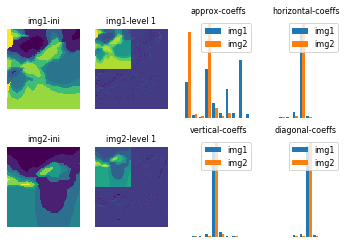

Level 1 img1 size: 57*52
Distance component: 0.014662954269759713


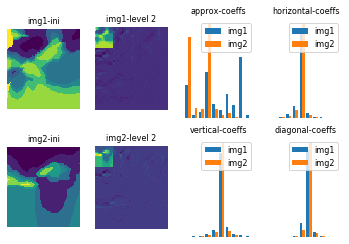

Level 2 img1 size: 29*26
Distance component: 0.02020911984722317


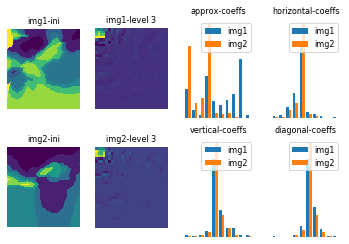

Level 3 img1 size: 15*13
Distance component: 0.032182579561291724


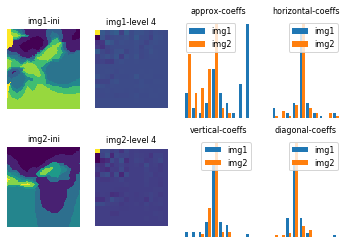

08-Nov-2021 (13:37:06) - COMPUTING WAVELET BASED DIST 2D categ END


In [3]:
# categorical case
img1 = lithocode_all[slice_iz,:,:,sample_num1] # for illustration, we consider the magnetic response of random sample #9
img2 = lithocode_all[slice_iz,:,:,sample_num2] # for illustration, we consider the magnetic response of random sample #2

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING WAVELET BASED DIST 2D categ START")
d = dist_wavelet(img1,img2,n_levels,n_bins,plot=True,verb=True)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING WAVELET BASED DIST 2D categ END")

## 3D illustration
Each plot illustrates the wavelet decomposition of two 3D voxets called img1 and img2 at successive levels. The first row displays 2D sections of the series of coefficients for the 3D voxets decomposed at a given level. The last row shows the histograms of each type of coefficients for both images.

08-Nov-2021 (13:37:06) - COMPUTING WAVELET BASED DIST 3D continuous START
Level 0 img1 size: 26*113*103
Level 0 coeffs size: 13*57*52
Distance component: 0.004289034105588047


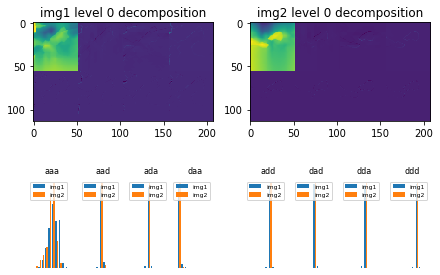

plotting coeffs size =13*57*52
Level 1 img1 size: 13*57*52
Level 1 coeffs size: 7*29*26
Distance component: 0.006140239870037638


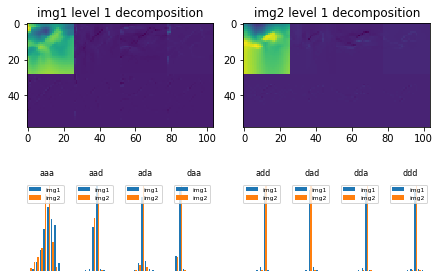

plotting coeffs size =7*29*26
Level 2 img1 size: 7*29*26
Level 2 coeffs size: 4*15*13
Distance component: 0.01329192735945423


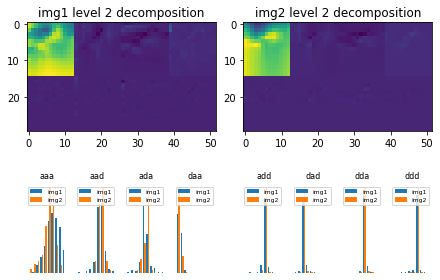

plotting coeffs size =4*15*13
Level 3 img1 size: 4*15*13
Level 3 coeffs size: 2*8*7
Distance component: 0.02244940219740252


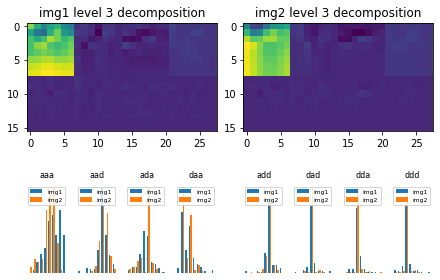

plotting coeffs size =2*8*7
08-Nov-2021 (13:37:10) - COMPUTING WAVELET BASED DIST 3D continuous END


In [4]:
# Continuous case
img1 = scalarfield_all[slice_iz:,:,:,sample_num1] # for illustration, we consider the magnetic response of random sample #9
img2 = scalarfield_all[slice_iz:,:,:,sample_num2] # for illustration, we consider the magnetic response of random sample #2
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING WAVELET BASED DIST 3D continuous START")
d = dist_wavelet(img1,img2,n_levels,n_bins,plot=True,verb=True)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING WAVELET BASED DIST 3D continuous END")

08-Nov-2021 (13:37:10) - COMPUTING WAVELET BASED DIST 3D categ START
Level 0 img1 size: 26*113*103
Level 0 coeffs size: 13*57*52
Distance component: 0.005723414447111002


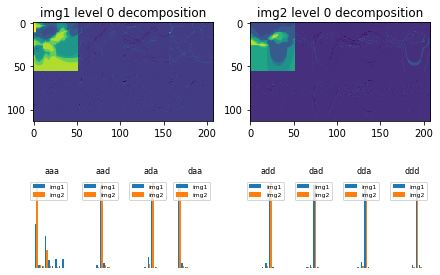

plotting coeffs size =13*57*52
Level 1 img1 size: 13*57*52
Level 1 coeffs size: 7*29*26
Distance component: 0.00851178149858551


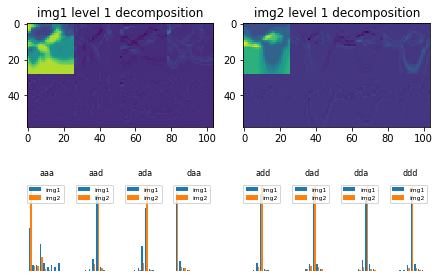

plotting coeffs size =7*29*26
Level 2 img1 size: 7*29*26
Level 2 coeffs size: 4*15*13
Distance component: 0.011266009759859502


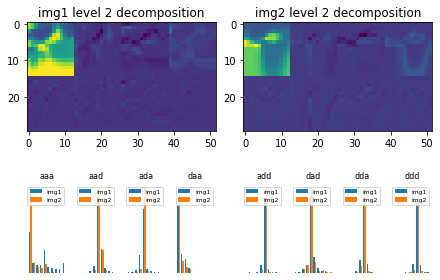

plotting coeffs size =4*15*13
Level 3 img1 size: 4*15*13
Level 3 coeffs size: 2*8*7
Distance component: 0.0268816941900604


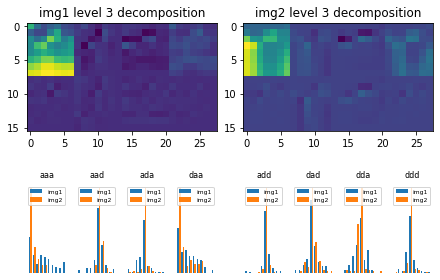

plotting coeffs size =2*8*7
08-Nov-2021 (13:37:15) - COMPUTING WAVELET BASED DIST 3D categ END


In [5]:
# Categorical case
img1 = lithocode_all[slice_iz:,:,:,sample_num1] # for illustration, we consider the magnetic response of random sample #9
img2 = lithocode_all[slice_iz:,:,:,sample_num2] # for illustration, we consider the magnetic response of random sample #2
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING WAVELET BASED DIST 3D categ START")
d = dist_wavelet(img1,img2,n_levels,n_bins,plot=True,verb=True)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING WAVELET BASED DIST 3D categ END")


## Compute for all pairs of voxets<span style='color:red'>\*</span>
<span style='color:red'>**\*WARNING: IT COULD TAKE 2 MINUTES. PRECOMPUTED RESULTS ALREADY AVAILABLE IN THE PICKLE FOLDER** </span>

In [6]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING WAVELET BASED DIST ALL START")

dist_wvt_lc = np.zeros((3*nbsamples,3*nbsamples))
dist_wvt_sf = np.zeros((3*nbsamples,3*nbsamples))

k=0
for i in range(3*nbsamples):
    for j in range(i):
        k+=1
        print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+'k = '+str(k)+' - i = '+str(i)+' j = ',str(j))
        dist_wvt_lc[i,j] = dist_wavelet(lithocode_all[slice_iz:,:,:,i],lithocode_all[slice_iz:,:,:,j],n_levels,n_bins)
        dist_wvt_sf[i,j] = dist_wavelet(scalarfield_all[slice_iz:,:,:,i],scalarfield_all[slice_iz:,:,:,j],n_levels,n_bins)
        dist_wvt_lc[j,i] = dist_wvt_lc[i,j]
        dist_wvt_sf[j,i] = dist_wvt_sf[i,j]

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING WAVELET BASED DIST ALL END")


08-Nov-2021 (13:37:15) - COMPUTING WAVELET BASED DIST ALL START
08-Nov-2021 (13:37:15) - k = 1 - i = 1 j =  0
08-Nov-2021 (13:37:15) - k = 2 - i = 2 j =  0
08-Nov-2021 (13:37:15) - k = 3 - i = 2 j =  1
08-Nov-2021 (13:37:15) - k = 4 - i = 3 j =  0
08-Nov-2021 (13:37:15) - k = 5 - i = 3 j =  1
08-Nov-2021 (13:37:15) - k = 6 - i = 3 j =  2
08-Nov-2021 (13:37:15) - k = 7 - i = 4 j =  0
08-Nov-2021 (13:37:15) - k = 8 - i = 4 j =  1
08-Nov-2021 (13:37:15) - k = 9 - i = 4 j =  2
08-Nov-2021 (13:37:15) - k = 10 - i = 4 j =  3
08-Nov-2021 (13:37:15) - k = 11 - i = 5 j =  0
08-Nov-2021 (13:37:16) - k = 12 - i = 5 j =  1
08-Nov-2021 (13:37:16) - k = 13 - i = 5 j =  2
08-Nov-2021 (13:37:16) - k = 14 - i = 5 j =  3
08-Nov-2021 (13:37:16) - k = 15 - i = 5 j =  4
08-Nov-2021 (13:37:16) - k = 16 - i = 6 j =  0
08-Nov-2021 (13:37:16) - k = 17 - i = 6 j =  1
08-Nov-2021 (13:37:16) - k = 18 - i = 6 j =  2
08-Nov-2021 (13:37:16) - k = 19 - i = 6 j =  3
08-Nov-2021 (13:37:16) - k = 20 - i = 6 j =  4
08-No

08-Nov-2021 (13:37:30) - k = 170 - i = 18 j =  16
08-Nov-2021 (13:37:31) - k = 171 - i = 18 j =  17
08-Nov-2021 (13:37:31) - k = 172 - i = 19 j =  0
08-Nov-2021 (13:37:31) - k = 173 - i = 19 j =  1
08-Nov-2021 (13:37:31) - k = 174 - i = 19 j =  2
08-Nov-2021 (13:37:31) - k = 175 - i = 19 j =  3
08-Nov-2021 (13:37:31) - k = 176 - i = 19 j =  4
08-Nov-2021 (13:37:31) - k = 177 - i = 19 j =  5
08-Nov-2021 (13:37:31) - k = 178 - i = 19 j =  6
08-Nov-2021 (13:37:31) - k = 179 - i = 19 j =  7
08-Nov-2021 (13:37:31) - k = 180 - i = 19 j =  8
08-Nov-2021 (13:37:32) - k = 181 - i = 19 j =  9
08-Nov-2021 (13:37:32) - k = 182 - i = 19 j =  10
08-Nov-2021 (13:37:32) - k = 183 - i = 19 j =  11
08-Nov-2021 (13:37:32) - k = 184 - i = 19 j =  12
08-Nov-2021 (13:37:32) - k = 185 - i = 19 j =  13
08-Nov-2021 (13:37:32) - k = 186 - i = 19 j =  14
08-Nov-2021 (13:37:32) - k = 187 - i = 19 j =  15
08-Nov-2021 (13:37:32) - k = 188 - i = 19 j =  16
08-Nov-2021 (13:37:32) - k = 189 - i = 19 j =  17
08-Nov-202

08-Nov-2021 (13:37:46) - k = 338 - i = 26 j =  12
08-Nov-2021 (13:37:46) - k = 339 - i = 26 j =  13
08-Nov-2021 (13:37:46) - k = 340 - i = 26 j =  14
08-Nov-2021 (13:37:46) - k = 341 - i = 26 j =  15
08-Nov-2021 (13:37:46) - k = 342 - i = 26 j =  16
08-Nov-2021 (13:37:46) - k = 343 - i = 26 j =  17
08-Nov-2021 (13:37:46) - k = 344 - i = 26 j =  18
08-Nov-2021 (13:37:46) - k = 345 - i = 26 j =  19
08-Nov-2021 (13:37:46) - k = 346 - i = 26 j =  20
08-Nov-2021 (13:37:46) - k = 347 - i = 26 j =  21
08-Nov-2021 (13:37:47) - k = 348 - i = 26 j =  22
08-Nov-2021 (13:37:47) - k = 349 - i = 26 j =  23
08-Nov-2021 (13:37:47) - k = 350 - i = 26 j =  24
08-Nov-2021 (13:37:47) - k = 351 - i = 26 j =  25
08-Nov-2021 (13:37:47) - k = 352 - i = 27 j =  0
08-Nov-2021 (13:37:47) - k = 353 - i = 27 j =  1
08-Nov-2021 (13:37:47) - k = 354 - i = 27 j =  2
08-Nov-2021 (13:37:47) - k = 355 - i = 27 j =  3
08-Nov-2021 (13:37:47) - k = 356 - i = 27 j =  4
08-Nov-2021 (13:37:47) - k = 357 - i = 27 j =  5
08-Nov

## Multi Scale Dimensioning representation<span style='color:red'>\*</span>
<span style='color:red'>**\*if all pairs of distances have been computed** </span>

08-Nov-2021 (13:37:55) - COMPUTING 2D MDS REPRESENTATION START


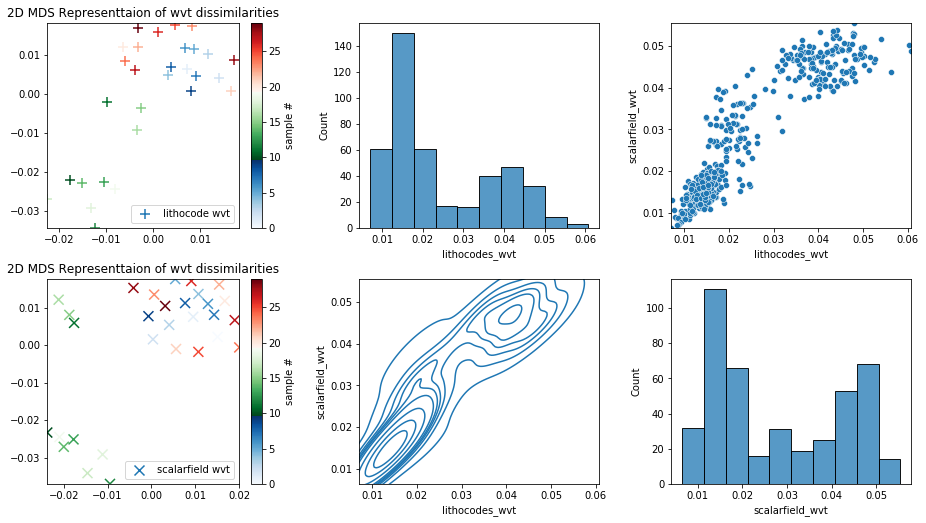

08-Nov-2021 (13:37:57) - COMPUTING 2D MDS REPRESENTATION END


In [7]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING 2D MDS REPRESENTATION START")
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)

mdspos_lc = mds.fit(dist_wvt_lc).embedding_
mdspos_sf = mds.fit(dist_wvt_sf).embedding_

s_id = np.arange(nbsamples*3)
# Plot concentric circle dataset
colors1 = plt.cm.Blues(np.linspace(0., 1, 512))
colors2 = np.flipud(plt.cm.Greens(np.linspace(0, 1, 512)))
colors3 = plt.cm.Reds(np.linspace(0, 1, 512))
colors = np.vstack((colors1, colors2, colors3))
mycmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

ix=np.tril_indices(nbsamples*3,k=-1)
df= pd.DataFrame({'lithocodes_wvt':dist_wvt_lc[ix], 'scalarfield_wvt':dist_wvt_sf[ix]})

lcmin = np.amin(dist_wvt_lc[ix]) 
lcmax = np.amax(dist_wvt_lc[ix])
sfmin = np.amin(dist_wvt_sf[ix]) 
sfmax = np.amax(dist_wvt_sf[ix])

lcMDSxmin = np.min(mdspos_lc[:,0])
lcMDSxmax = np.max(mdspos_lc[:,0])
lcMDSymin = np.min(mdspos_lc[:,1])
lcMDSymax = np.max(mdspos_lc[:,1])

sfMDSxmin = np.min(mdspos_sf[:,0])
sfMDSxmax = np.max(mdspos_sf[:,0])
sfMDSymin = np.min(mdspos_sf[:,1])
sfMDSymax = np.max(mdspos_sf[:,1])

s = 100
fig = plt.figure()
plt.subplot(231)
plt.title('2D MDS Representtaion of wvt dissimilarities')
plt.scatter(mdspos_lc[:, 0], mdspos_lc[:, 1], c=s_id,cmap=mycmap, s=s, label='lithocode wvt', marker='+')
plt.xlim(lcMDSxmin,lcMDSxmax)
plt.ylim(lcMDSymin,lcMDSymax)
plt.legend(scatterpoints=1, loc='best', shadow=False)
cbar = plt.colorbar()
cbar.set_label('sample #')
plt.subplot(234)
plt.title('2D MDS Representtaion of wvt dissimilarities')
plt.scatter(mdspos_sf[:, 0], mdspos_sf[:, 1], c=np.arange(nbsamples*3),cmap=mycmap, s=s, label='scalarfield wvt', marker='x')
plt.xlim(sfMDSxmin,sfMDSxmax)
plt.ylim(sfMDSymin,sfMDSymax)
plt.legend(scatterpoints=1, loc='best', shadow=False)
cbar = plt.colorbar()
cbar.set_label('sample #')
plt.subplot(232)
sns.histplot(df.lithocodes_wvt)
plt.subplot(233)
sns.scatterplot(x=df.lithocodes_wvt,y=df.scalarfield_wvt)
plt.xlim(lcmin,lcmax)
plt.ylim(sfmin,sfmax)
plt.subplot(235)
sns.kdeplot(x=df.lithocodes_wvt,y=df.scalarfield_wvt)
plt.xlim(lcmin,lcmax)
plt.ylim(sfmin,sfmax)
plt.subplot(236)
sns.histplot(df.scalarfield_wvt)
fig.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.6, wspace=0.3, hspace=0.25)
plt.show()

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING 2D MDS REPRESENTATION END")


## Save indicators<span style='color:red'>\*</span>
<span style='color:red'>**\*if all pairs of distances have been computed** </span>

In [8]:
with open(picklefilenamewavelet, 'wb') as f:
    pickle.dump([dist_wvt_lc,dist_wvt_sf], f)
